In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

In [ ]:
import qiskit

In [ ]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
from qiskit import IBMQ

In [ ]:
!pip install qiskit-ibmq-provider

In [ ]:
IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb6557f339f326fda4b97d2894de135f54fe2dee4e4e2319f5e7e8155b88c856b01502b8a0b9435607e4e6432e')

<ipython-input-6-c76922f7ec6d>:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb6557f339f326fda4b97d2894de135f54fe2dee4e4e2319f5e7e8155b88c856b01502b8a0b9435607e4e6432e')
<ipython-input-6-c76922f7ec6d>:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb65

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
from qiskit import *

In [ ]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


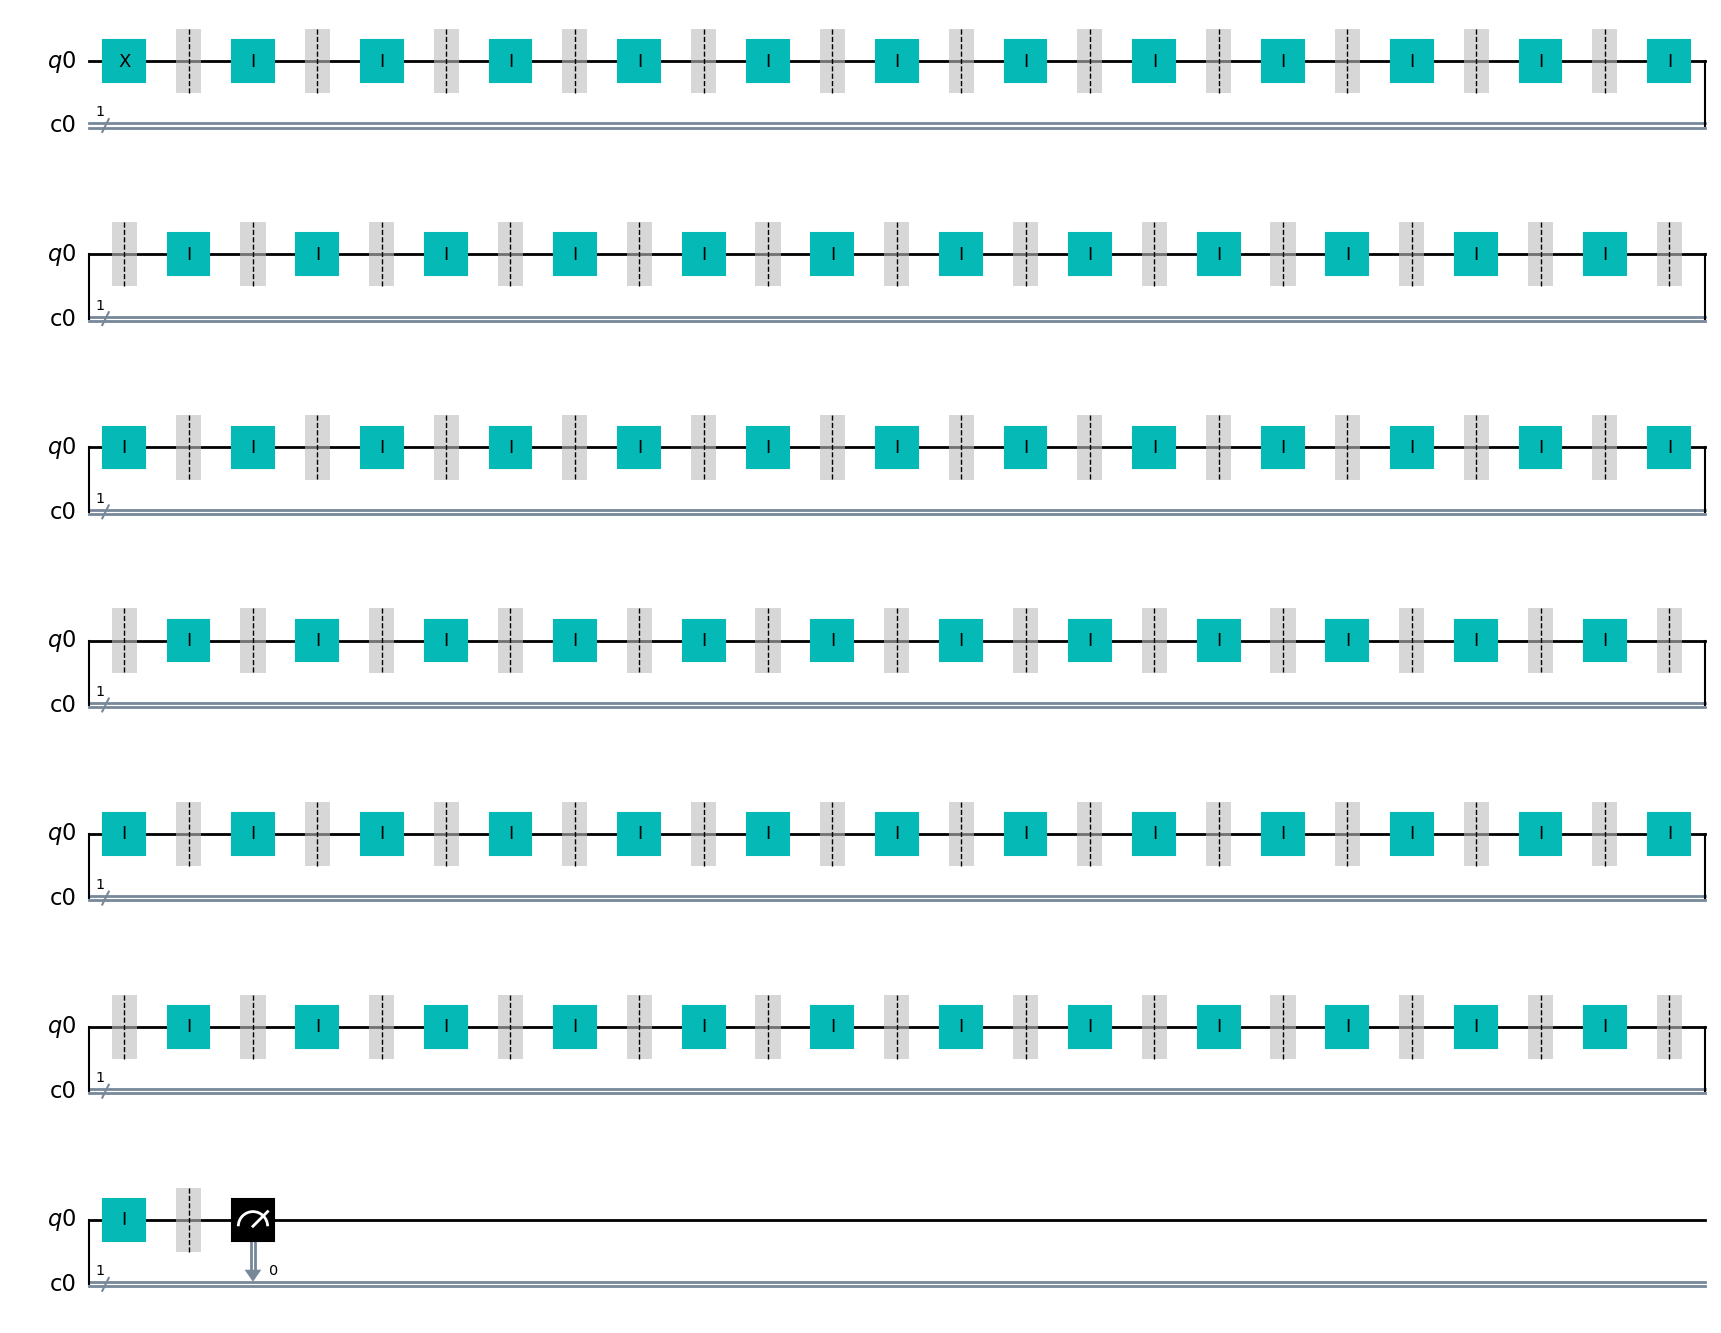

In [ ]:
circuit.x(qr[0])
#circuit.barrier(qr[0])

for i in range(75):
  circuit.barrier(qr[0])
  circuit.i(0)
  #circuit.barrier(qr[0])

circuit.barrier(qr[0])
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [ ]:
!pip install qiskit-aer

In [ ]:
#simulator = Aer.get_backend('qasm_simulator')
#sim_result = execute(circuit,backend=simulator, shots=1024).results()


simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1024)
sim_result = job.result()
counts = sim_result.get_counts(circuit)

In [ ]:
from  qiskit.visualization import plot_histogram

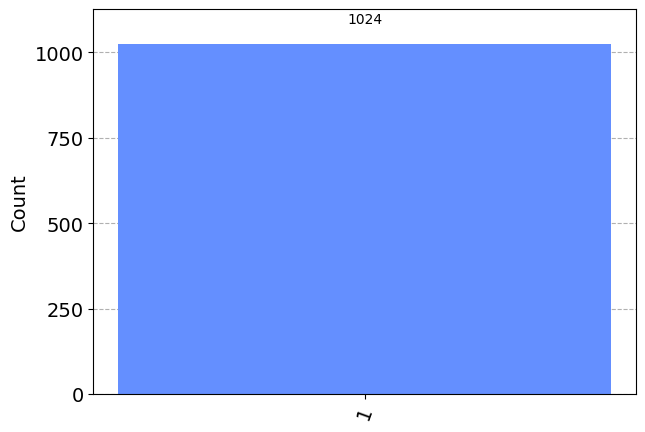

In [ ]:
plot_histogram(counts)

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibm_perth')

In [ ]:
job= execute(circuit, backend = device, shots= 2)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))


In [ ]:
!pip install qiskit-ignis

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


<ipython-input-21-54ba3ca492e6>:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

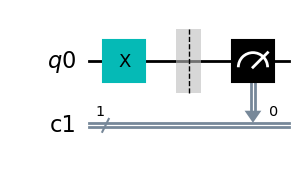

In [ ]:
cal_circuits[1].draw(output = 'mpl')

In [ ]:
len(cal_circuits)

2

In [ ]:
cal_job = execute(cal_circuits,
                  backend = device
                  shots = 1024
                  optimization_level = 0
                  )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()


In [ ]:
plot_histogram(
cal_results.get_counts(cal_circuits[3])
)

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
mitigated_result = meas_filter.apply(device_result)

In [ ]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts],legend=['device, noisy','device, mitigated'])

In [ ]:
def extract_counts(back_res):
    lst0, lst1 = [], []


    for i in range(len(time)):
        if '1' in back_res.get_counts(i):
            i1 = back_res.get_counts(i)['1']
        else:
            i1 = 0
        if '0' in back_res.get_counts(i):
            i0 = back_res.get_counts(i)['0']
        else:
            i0 = 0

        q1 = i1/shots
        q0 = i0/shots

        lst1.append(q1)
        lst0.append(q0)

    return [lst0, lst1]

In [ ]:
device_results0, device_results1 = extract_counts(device_result)
mitigated_result0, mitigated_result1 = extract_counts(mitigated_result)

In [ ]:
import numpy as np
%matplotlib inline

cool = pl.cm.cool(np.linspace(0, 1, N))
plasma = pl.cm.plasma(np.linspace(0, 1, N + 1))
magma = pl.cm.magma(np.linspace(0, 1, N))
winter = pl.cm.winter(np.linspace(0, 1, N))


time = np.linspace(0, 74*4, 75)


plt.style.use('seaborn')
# matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

plt.title('Decay of Qubits [0]')
plt.xlabel('$t$ ($\mu$s)')
plt.ylabel('State Population')
plt.ylim(-0.05, 1.05)

plt.plot(time, mitigated_result0, label = "0", marker='.', markersize=10, linestyle='', c = cool[0])
plt.plot(time, mitigated_result1, label = "1", marker='.', markersize=10, linestyle='', c = cool[1])

plt.plot(time, device_results0, label = "0", marker='*', markersize=7, linestyle='', c = plasma[0])
plt.plot(time, device_results1, label = "1", marker='*', markersize=7, linestyle='', c = plasma[1])

plt.legend(loc = "best", numpoints = 1, frameon = True)

plt.show()

In [ ]:
import csv

In [ ]:
rows0 = zip(time, mitigated_result0)
rows1 = zip(time, mitigated_result1)


with open('raw0.csv', "w") as a:
    writer = csv.writer(a)
    for row in rows0:
        writer.writerow(row)

with open('raw1.csv', "w") as a:
    writer = csv.writer(a)
    for row in rows1:
        writer.writerow(row)